In [4]:
from sklearn.datasets import make_circles
import pandas as pd
import seaborn as sns
import numpy as np

<AxesSubplot:xlabel='xo', ylabel='x1'>

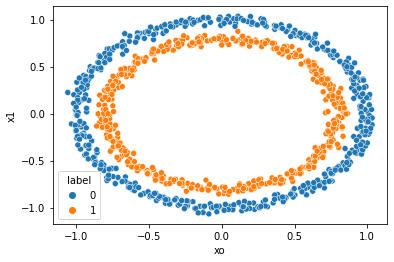

In [5]:
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)
circles=pd.DataFrame({'xo':x[:,0],'x1':x[:,1],'label':y})
sns.scatterplot(data=circles,x='xo',y='x1',hue='label')

In [6]:
circles.head(5)

,xo,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [8]:
model=tf.keras.Sequential([tf.keras.layers.Dense(16,activation='relu',input_shape=(2,)),tf.keras.layers.Dense(8,activation='relu'),tf.keras.layers.Dense(1,activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [9]:
history=model.fit(x_train,y_train,epochs=10)

Epoch 1/10
22/22 [==============================] - 2s 1ms/step - loss: 0.6927 - accuracy: 0.4943
Epoch 2/10
22/22 [==============================] - 0s 952us/step - loss: 0.6734 - accuracy: 0.6143
Epoch 3/10
22/22 [==============================] - 0s 952us/step - loss: 0.6478 - accuracy: 0.7800
Epoch 4/10
22/22 [==============================] - 0s 952us/step - loss: 0.5988 - accuracy: 0.7557
Epoch 5/10
22/22 [==============================] - 0s 952us/step - loss: 0.5084 - accuracy: 0.8886
Epoch 6/10
22/22 [==============================] - 0s 952us/step - loss: 0.3810 - accuracy: 0.9486
Epoch 7/10
22/22 [==============================] - 0s 1000us/step - loss: 0.2665 - accuracy: 0.9843
Epoch 8/10
22/22 [==============================] - 0s 952us/step - loss: 0.1747 - accuracy: 0.9971
Epoch 9/10
22/22 [==============================] - 0s 1000us/step - loss: 0.1210 - accuracy: 0.9986
Epoch 10/10
22/22 [==============================] - 0s 952us/step - loss: 0.0873 - accuracy: 0.9943

In [10]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 1.0000


[0.08818917721509933, 1.0]

Text(0, 0.5, 'loss value')

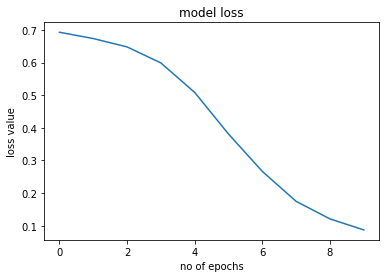

In [11]:
import matplotlib.pyplot as plt
plt.title("model loss")
plt.plot(history.history['loss'])
plt.xlabel("no of epochs")
plt.ylabel("loss value")

313/313 [==============================] - 0s 610us/step
binary classification
313/313 [==============================] - 0s 600us/step
binary classification


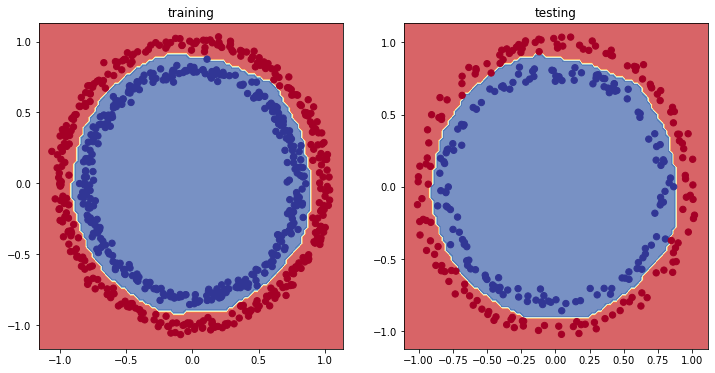

In [12]:
def plotq(model,x,y):
    x_min,x_max=x[:,0].min()-0.1,x[:,0].max()+0.1
    y_min,y_max=x[:,1].min()-0.1,x[:,1].max()+0.1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
    
    x_in=np.c_[xx.ravel(),yy.ravel()]
    y_pred=model.predict(x_in)
    if len(y_pred[0])>1:
        print("doing multiclass classification")
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("binary classification")
        y_pred=np.round(y_pred).reshape(xx.shape)
        
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)    
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("training")
plotq(model,x_train,y_train)
plt.subplot(1,2,2)
plt.title("testing")
plotq(model,x_test,y_test)